# Final Project - Scientific Programming with Python 

In [2]:
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install pydotplus
!pip install numpy
!pip install pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
import sklearn as skl
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import pydotplus

## Intro to exploration data set reviews && Initial Data Analysis
Data set contains the average review ratings of users for grouped by different categories. The first 3 features in the data set are user attributes while the rest are ratings. The 8th feature is the target class feature, which indicates the last rating given by the user for a museum category location (1-5).

Attribute 1 : Profile Age (how long has the user existed, <5 years, 5-10 years, >10 years)
Attribute 2 : User Gender (male/female/?)
Attribute 3 : User Marital status (Married/Single)
Attribute 4 : Average ratings on churches
Attribute 5 : Average ratings on resorts
Attribute 6 : Average ratings on beaches
Attribute 7 : Average ratings on parks
Attribute 8 : Last User Rating on museum (Target 1/2/3/4/5)
Attribute 9 : Average ratings on malls
Attribute 10 : Average ratings on zoo
Attribute 11 : Average ratings on restaurants
Attribute 12 : Average ratings on pubs/bars
Attribute 13 : Average ratings on local services
Attribute 14 : Average ratings on burger/pizza shops
Attribute 15 : Average ratings on hotels/other lodgings
Attribute 16 : Average ratings on dance clubs
Attribute 17 : Average ratings on swimming pools
Attribute 18 : Average ratings on gyms
Attribute 19 : Average ratings on bakeries
Attribute 20 : Average ratings on beauty & spas
Attribute 21 : Average ratings on cafes
Attribute 22 : Average ratings on view points
Attribute 23 : Average ratings on monuments
Attribute 24 : Average ratings on gardens

First ill open the csv file and start looking to him to see the data,the subject, featuers and if there is some empty featuers, the size of the data set and anything that can help me understand the dataframe.
The data set of reviews of user rates places, we can see that there is categorical featuers and numerical featuers, category 10 is categorical because the values inside are numbers that are represented in string, all the values of the rates from the user is okey they should be between 0 to 5 and they are.

In [3]:
missing_values = ["", "?"]
df = pd.read_csv('reviews2.csv',na_values=missing_values)
df.head()

Profile Age  Gender Marital Status  Category 1  Category 2  Category 3  \
0        5-10    male         Single         0.0         0.0        3.63   
1        5-10    male         Single         0.0         0.0        3.63   
2        5-10  female         Single         0.0         0.0        3.63   
3        5-10    male         Single         0.0         0.5        3.63   
4        5-10  female         Single         0.0         0.0        3.63   

   Category 4  Category 5  Category 6  Category 7  ...  Category 12  \
0        3.65           5         5.0        2.35  ...          1.7   
1        3.65           5         5.0        2.64  ...          1.7   
2        3.63           5         5.0        2.64  ...          1.7   
3        3.63           5         5.0        2.35  ...          1.7   
4        3.63           5         5.0        2.64  ...          1.7   

   Category 13 Category 14  Category 15  Category 16  Category 17  \
0         1.72         0.5          0.0          0.5          0.0   
1         1.72         0.5          0.0          0.5          0.0   
2         1.72         0.5          0.0          0.5          0.0   
3         1.72         0.5          0.0          0.5          0.0   
4         1.72         0.5          0.0          0.5          0.0   

   Category 18  Category 19  Category 20  Category 21  
0          0.0          0.0          0.0          0.0  
1          0.0          0.0          0.0          0.0  
2          0.0          0.0          0.0          0.0  
3          0.0          0.0          0.0          0.0  
4          0.0          0.0          0.0          0.0  

[5 rows x 24 columns]

In [4]:
featuers = df.columns
print(featuers)
# we can see that we have 24 featuers looks like 3 categorical and 21 numerical.
df.shape
# gets the number of rows and cols in the data frame - we can see that we have (5456 rows,24 columns)

Index(['Profile Age', 'Gender', 'Marital Status', 'Category 1', 'Category 2',
       'Category 3', 'Category 4', 'Category 5', 'Category 6', 'Category 7',
       'Category 8', 'Category 9', 'Category 10', 'Category 11', 'Category 12',
       'Category 13', 'Category 14', 'Category 15', 'Category 16',
       'Category 17', 'Category 18', 'Category 19', 'Category 20',
       'Category 21'],
      dtype='object')


(5456, 24)

In [5]:
df.describe(include = "all")

# df.info()
# df.count().sort_values()

Profile Age  Gender Marital Status   Category 1   Category 2  \
count         5389    5165           5424  5456.000000  5261.000000   
unique           3       2              4          NaN          NaN   
top             <5  female         Single          NaN          NaN   
freq          3048    2743           2772          NaN          NaN   
mean           NaN     NaN            NaN     1.455720     2.321433   
std            NaN     NaN            NaN     0.827604     1.422826   
min            NaN     NaN            NaN     0.000000     0.000000   
25%            NaN     NaN            NaN     0.920000     1.360000   
50%            NaN     NaN            NaN     1.340000     1.900000   
75%            NaN     NaN            NaN     1.810000     2.690000   
max            NaN     NaN            NaN     5.000000     5.000000   

         Category 3   Category 4   Category 5   Category 6   Category 7  ...  \
count   5456.000000  5456.000000  5456.000000  5456.000000  5456.000000  ...   
unique          NaN          NaN          NaN          NaN          NaN  ...   
top             NaN          NaN          NaN          NaN          NaN  ...   
freq            NaN          NaN          NaN          NaN          NaN  ...   
mean       2.489331     2.796886     2.979472     3.351395     2.540795  ...   
std        1.247815     1.309159     1.355012     1.413492     1.111391  ...   
min        0.000000     0.830000     1.000000     1.120000     0.860000  ...   
25%        1.540000     1.730000     2.000000     1.930000     1.620000  ...   
50%        2.060000     2.460000     3.000000     3.230000     2.170000  ...   
75%        2.740000     4.092500     4.000000     5.000000     3.190000  ...   
max        5.000000     5.000000     5.000000     5.000000     5.000000  ...   

        Category 12  Category 13  Category 14  Category 15  Category 16  \
count   5456.000000  5250.000000  5426.000000  5382.000000  5374.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       2.125511     2.188787     0.949349     0.823285     0.968122   
std        1.406542     1.577023     0.974128     0.950666     1.202365   
min        0.770000     0.760000     0.000000     0.000000     0.000000   
25%        1.190000     1.030000     0.580000     0.530000     0.520000   
50%        1.610000     1.490000     0.740000     0.690000     0.690000   
75%        2.360000     2.737500     0.910000     0.840000     0.860000   
max        5.000000     5.000000     5.000000     5.000000     5.000000   

        Category 17  Category 18  Category 19  Category 20  Category 21  
count   5456.000000  5456.000000  5456.000000  5456.000000  5455.000000  
unique          NaN          NaN          NaN          NaN          NaN  
top             NaN          NaN          NaN          NaN          NaN  
freq            NaN          NaN          NaN          NaN          NaN  
mean       1.000071     0.965838     1.750537     1.531453     1.560755  
std        1.193891     0.929853     1.598734     1.316889     1.171756  
min        0.000000     0.000000     0.000000     0.000000     0.000000  
25%        0.540000     0.570000     0.740000     0.790000     0.880000  
50%        0.690000     0.760000     1.030000     1.070000     1.290000  
75%        0.860000     1.000000     2.070000     1.560000     1.660000  
max        5.000000     5.000000     5.000000     5.000000     5.000000  

[11 rows x 24 columns]

In [6]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df['Category 10'].unique()
df['Category 10'] = np.where(df['Category 10'] == '2\t2.', str(2.2), df['Category 10'])
df['Category 10'].unique()

array(['1.7', '1.73', '1.71', '1.69', '1.67', '1.65', nan, '1.66', '1.64',
       '1.63', '5', '1.56', '1.55', '1.53', '1.52', '1.51', '1.5', '1.49',
       '1.48', '1.46', '2.13', '2.12', '2.1', '2.09', '2.08', '2.07',
       '2.06', '2.05', '2.04', '2.03', '2.01', '2', '1.98', '1.97',
       '1.95', '1.93', '1.91', '1.9', '1.88', '1.86', '1.84', '1.83',
       '1.81', '1.79', '1.77', '1.74', '1.72', '1.68', '1.6', '1.59',
       '1.58', '1.99', '2.47', '2.35', '1.61', '2.48', '2.59', '3.39',
       '2.31', '2.78', '2.79', '2.77', '2.76', '2.75', '2.74', '2.71',
       '2.69', '2.68', '2.66', '2.65', '2.63', '2.61', '2.57', '2.55',
       '2.53', '2.51', '2.49', '1.94', '1.92', '1.82', '1.76', '1.62',
       '4.08', '4.04', '4.02', '4.01', '4', '3.99', '3.98', '3.96',
       '3.95', '3.94', '3.93', '3.91', '3.9', '3.88', '3.87', '3.86',
       '3.84', '3.85', '2.17', '3', '2.99', '2.82', '2.83', '2.81', '2.8',
       '2.73', '2.72', '2.67', '2.64', '2.62', '2.52', '2.5', '1.57',
     

In [7]:
df['Category 10'] = pd.to_numeric(df['Category 10'])
df['Category 10'].unique()
df.describe()

Category 1   Category 2   Category 3   Category 4   Category 5  \
count  5456.000000  5261.000000  5456.000000  5456.000000  5456.000000   
mean      1.455720     2.321433     2.489331     2.796886     2.979472   
std       0.827604     1.422826     1.247815     1.309159     1.355012   
min       0.000000     0.000000     0.000000     0.830000     1.000000   
25%       0.920000     1.360000     1.540000     1.730000     2.000000   
50%       1.340000     1.900000     2.060000     2.460000     3.000000   
75%       1.810000     2.690000     2.740000     4.092500     4.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

        Category 6   Category 7   Category 8   Category 9  Category 10  \
count  5456.000000  5456.000000  5456.000000  5166.000000  5238.000000   
mean      3.351395     2.540795     3.126019     2.832567     2.547805   
std       1.413492     1.111391     1.356802     1.308758     1.382265   
min       1.120000     0.860000     0.840000     0.810000     0.780000   
25%       1.930000     1.620000     1.800000     1.632500     1.580000   
50%       3.230000     2.170000     2.800000     2.680000     1.990000   
75%       5.000000     3.190000     5.000000     3.540000     3.210000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

       Category 11  Category 12  Category 13  Category 14  Category 15  \
count  5455.000000  5456.000000  5250.000000  5426.000000  5382.000000   
mean      2.078339     2.125511     2.188787     0.949349     0.823285   
std       1.249208     1.406542     1.577023     0.974128     0.950666   
min       0.780000     0.770000     0.760000     0.000000     0.000000   
25%       1.290000     1.190000     1.030000     0.580000     0.530000   
50%       1.690000     1.610000     1.490000     0.740000     0.690000   
75%       2.285000     2.360000     2.737500     0.910000     0.840000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

       Category 16  Category 17  Category 18  Category 19  Category 20  \
count  5374.000000  5456.000000  5456.000000  5456.000000  5456.000000   
mean      0.968122     1.000071     0.965838     1.750537     1.531453   
std       1.202365     1.193891     0.929853     1.598734     1.316889   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.520000     0.540000     0.570000     0.740000     0.790000   
50%       0.690000     0.690000     0.760000     1.030000     1.070000   
75%       0.860000     0.860000     1.000000     2.070000     1.560000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

       Category 21  
count  5455.000000  
mean      1.560755  
std       1.171756  
min       0.000000  
25%       0.880000  
50%       1.290000  
75%       1.660000  
max       5.000000

<AxesSubplot:>

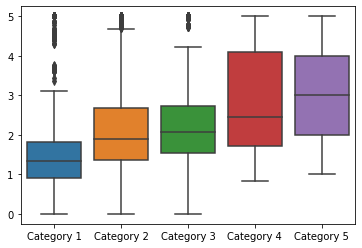

In [8]:
#check if there is rates thats not grater then zero
sns.boxplot(data=df[['Category 1','Category 2','Category 3','Category 4','Category 5']])

<AxesSubplot:>

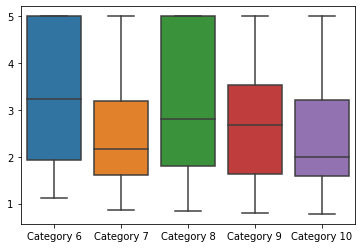

In [9]:
sns.boxplot(data=df[['Category 6','Category 7','Category 8','Category 9','Category 10']])

<AxesSubplot:>

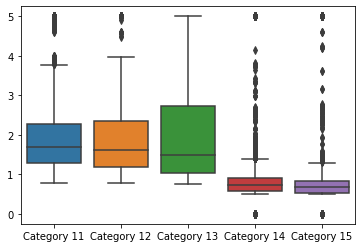

In [10]:
sns.boxplot(data=df[['Category 11','Category 12','Category 13','Category 14','Category 15']])

<AxesSubplot:>

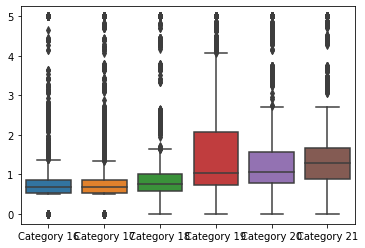

In [12]:
sns.boxplot(data=df[['Category 16','Category 17','Category 18','Category 19','Category 20','Category 21']])

In [94]:
 df.rename(columns={'Category 1': 'Average ratings on churches','Category 2': 'Average ratings on resorts','Category 3':'Average ratings on beaches','Category 4':'Average ratings on parks',
                                    'Category 5':'Last User Rating on museum','Category 6':'Average ratings on malls','Category 7':'Average ratings on zoo','Category 8':'Average ratings on resaurants',
                                    'Category 9':'Average ratings on pubs/bars','Category 10':'Average ratings on local services','Category 11':'Average ratings on burger/pizza shops',
                                    'Category 12':'Average ratings on hotels/other lodgings','Category 13':'Average ratings on dance clubs','Category 14':'Average ratings on swimming pools',
                                    'Category 15':'Average ratings on gyms','Category 16':'Average ratings on bakeries','Category 17':'Average ratings on beauty & spa',
                                    'Category 18':'Average ratings on cafes','Category 19':'Average ratings on view points','Category 20':'Average ratings on monuments','Category 21':'Average ratings on gardens'},inplace=True)
df

Profile Age  Gender Marital Status  Average ratings on churches  \
0           5-10    male         Single                         0.00   
1           5-10    male         Single                         0.00   
2           5-10  female         Single                         0.00   
3           5-10    male         Single                         0.00   
4           5-10  female         Single                         0.00   
5           5-10    male         Single                         0.00   
6           5-10  female         Single                         0.00   
7            NaN  female         Single                         0.00   
8             <5  female         Single                         0.00   
9             <5    male         Single                         0.00   
10            <5  female         Single                         0.00   
11            <5  female         Single                         0.00   
12            <5    male         Single                         0.00   
13            <5    male         Single                         0.00   
14            <5    male         single                         0.00   
15            <5    male         single                         0.00   
16            <5    male         Single                         0.00   
17            <5  female         Single                         0.00   
18            <5  female         Single                         0.00   
19            <5  female         Single                         0.00   
20            <5  female         single                         0.00   
21            <5  female         Single                         0.00   
22            <5    male         Single                         0.00   
23          5-10    male         Single                         0.00   
24          5-10  female         Single                         0.00   
25          5-10  female         Single                         0.00   
26          5-10    male         Single                         0.00   
27          5-10  female         Single                         0.00   
28          5-10    male         Single                         0.00   
29          5-10  female         Single                         0.00   
30          5-10  female         Single                         0.00   
31          5-10     NaN         Single                         0.00   
32          5-10    male         Single                         0.00   
33          5-10     NaN         Single                         0.00   
34          5-10  female         Single                         0.00   
35          5-10  female         Single                         0.00   
36          5-10    male         Single                         0.50   
37          5-10    male         Single                         0.51   
38          5-10    male         Single                         0.52   
39            <5    male         Single                         0.53   
40          5-10  female         Single                         0.54   
41          5-10    male         Single                         0.54   
42          5-10    male         Single                         0.55   
43          5-10  female         Single                         0.56   
44            <5  female         Single                         0.57   
45            <5    male         Single                         0.58   
46            <5  female         Single                         0.59   
47            <5  female         Single                         0.60   
48            <5    male         Single                         0.60   
49            <5  female         Single                         0.61   
50            <5  female         Single                         0.62   
51          5-10  female         Single                         0.62   
52            <5    male         Single                         0.63   
53          5-10  female         Single                         0.63   
54          5-10  female         Single      

Category 4     True
Category 5     True
Category 6     True
Category 7     True
Category 8     True
Category 9     True
Category 11    True
Category 12    True
Category 13    True
Name: min, dtype: bool

In [95]:
# Cleaning null cols from the csv data frame
# check the categorical featuers if there is null values, if does we check if it effects the data set:
df['Gender'].unique()
df['Profile Age'].unique()
df['Marital Status'].unique()

array(['Single', 'single', nan, 'Married', 'married'], dtype=object)

In [96]:
df['Marital Status'] = np.where(df['Marital Status'] == 'Single', 'single',(np.where(df["Marital Status"] == 'Married','married','nan')))
df['Marital Status']

0        single
1        single
2        single
3        single
4        single
5        single
6        single
7        single
8        single
9        single
10       single
11       single
12       single
13       single
14          nan
15          nan
16       single
17       single
18       single
19       single
20          nan
21       single
22       single
23       single
24       single
25       single
26       single
27       single
28       single
29       single
30       single
31       single
32       single
33       single
34       single
35       single
36       single
37       single
38       single
39       single
40       single
41       single
42       single
43       single
44       single
45       single
46       single
47       single
48       single
49       single
50       single
51       single
52       single
53       single
54       single
55       single
56       single
57       single
58       single
59          nan
60          nan
61       single
62      

In [14]:
df.describe(include = "all")
# i see that the top value in Profile Age is '<5' in Gender is 'female' and in Marital Status is 'single', so ill fill
# the nan values with the top of every feature
df['Profile Age'].fillna('<5',inplace = True)
# df['Profile Age']
df['Marital Status'] = np.where(df['Marital Status'] == 'nan','single',df['Marital Status'])
# df['Marital Status']
df['Gender'].fillna('female', inplace = True)
df['Gender']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Profile Age     5456 non-null   object 
 1   Gender          5456 non-null   object 
 2   Marital Status  5424 non-null   object 
 3   Category 1      5456 non-null   float64
 4   Category 2      5261 non-null   float64
 5   Category 3      5456 non-null   float64
 6   Category 4      5456 non-null   float64
 7   Category 5      5456 non-null   int64  
 8   Category 6      5456 non-null   float64
 9   Category 7      5456 non-null   float64
 10  Category 8      5456 non-null   float64
 11  Category 9      5166 non-null   float64
 12  Category 10     5238 non-null   float64
 13  Category 11     5455 non-null   float64
 14  Category 12     5456 non-null   float64
 15  Category 13     5250 non-null   float64
 16  Category 14     5426 non-null   float64
 17  Category 15     5382 non-null   f

In [16]:
df.fillna(df.mean(), inplace=True)
df.info()
df.count().sort_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Profile Age     5456 non-null   object 
 1   Gender          5456 non-null   object 
 2   Marital Status  5424 non-null   object 
 3   Category 1      5456 non-null   float64
 4   Category 2      5456 non-null   float64
 5   Category 3      5456 non-null   float64
 6   Category 4      5456 non-null   float64
 7   Category 5      5456 non-null   int64  
 8   Category 6      5456 non-null   float64
 9   Category 7      5456 non-null   float64
 10  Category 8      5456 non-null   float64
 11  Category 9      5456 non-null   float64
 12  Category 10     5456 non-null   float64
 13  Category 11     5456 non-null   float64
 14  Category 12     5456 non-null   float64
 15  Category 13     5456 non-null   float64
 16  Category 14     5456 non-null   float64
 17  Category 15     5456 non-null   f

Marital Status    5424
Profile Age       5456
Category 19       5456
Category 18       5456
Category 17       5456
Category 16       5456
Category 15       5456
Category 14       5456
Category 13       5456
Category 12       5456
Category 11       5456
Category 10       5456
Category 9        5456
Category 8        5456
Category 7        5456
Category 6        5456
Category 5        5456
Category 4        5456
Category 3        5456
Category 2        5456
Category 1        5456
Gender            5456
Category 20       5456
Category 21       5456
dtype: int64